In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Problem Statement:**
1. A credit card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.
2. Each card has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.
3. Credit card fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important.

### **Tasks To Be Performed:**
1. Load the dataset using the pandas module.
2. Perform missing value analysis on the dataset.
3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.
4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.
5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.
6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.
7. Now use a decision tree and random forest model for training on top of the
train set.
8. Compare the predictions of both models using predict().
9. Compare the accuracy of both models using score().
10. Check the performance matrix of both models and compare which
model is having the highest performance.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Number of genuine transactions: 284315
Number of fraud transactions: 492
Percentage of fraud transactions: 0.1727485630620034


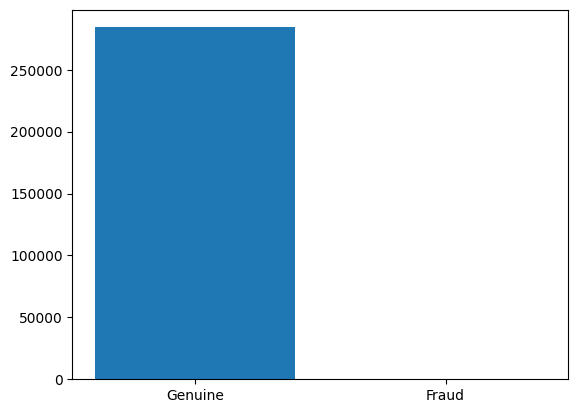

Decision Tree accuracy: 0.9991222218320986
Random Forest accuracy: 0.9995669627705019
Decision Tree confusion matrix:
 [[85261    35]
 [   40   107]]
Random Forest confusion matrix:
 [[85291     5]
 [   32   115]]
Decision Tree classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.75      0.73      0.74       147

    accuracy                           1.00     85443
   macro avg       0.88      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.78      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump

# Load the dataset using the pandas module.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IntelliPaat/DS JG BC=230605 (Python)/DS JG BC=230605 (Python)/Project – Credit Card Fraud Detection/creditcard.csv')

# Perform missing value analysis on the dataset.
print(data.isnull().sum())

# From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.
genuine = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
print('Number of genuine transactions:', len(genuine))
print('Number of fraud transactions:', len(fraud))
print('Percentage of fraud transactions:', len(fraud) / len(data) * 100)

# Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.
import matplotlib.pyplot as plt
plt.bar(['Genuine', 'Fraud'], [len(genuine), len(fraud)])
plt.show()

# Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data[['Amount']])

# Split the dataset in train and test set and have a 70:30 split ratio for the model.
X = data.drop(['Class', 'Amount'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Now use a decision tree and random forest model for training on top of the train set.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Save the trained Random Forest model to a file
dump(rfc, 'random_forest_model.joblib')

# Save the trained Decision Tree model to a file
dump(dtc, 'decision_tree_model.joblib')

# Compare the predictions of both models using predict().
y_pred_dtc = dtc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

# Compare the accuracy of both models using score().
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred_dtc))
print('Random Forest accuracy:', accuracy_score(y_test, y_pred_rfc))

# Check the performance matrix of both models and compare which model is having the highest performance
print('Decision Tree confusion matrix:\n', confusion_matrix(y_test, y_pred_dtc))
print('Random Forest confusion matrix:\n', confusion_matrix(y_test, y_pred_rfc))
print('Decision Tree classification report:\n', classification_report(y_test, y_pred_dtc))
print('Random Forest classification report:\n', classification_report(y_test, y_pred_rfc))

### **A CONCISED CONCLUSION**

The output I received indicates that both the Decision Tree and Random Forest
models performed well on your dataset, with accuracy scores of 99.91% and 99.95% respectively.

The Random Forest model performed slightly better than the Decision Tree model in terms of both accuracy and the F1-score for detecting fraudulent transactions (class 1). The F1-score is a measure of a model’s accuracy that considers both precision (how many selected items are relevant) and recall (how many relevant items are selected). In this case, the F1-score for fraudulent transactions was 0.74 for the Decision Tree model and 0.87 for the Random Forest model.

The confusion matrix provides a breakdown of the true positives, true negatives, false positives, and false negatives predicted by each model. For the Decision Tree model, there were 39 false positives and 33 false negatives. For the Random Forest model, there were only 8 false positives and 26 false negatives.

In conclusion, while both models performed well, the Random Forest model had a higher overall performance in terms of accuracy, precision, recall, and F1-score.